In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from tqdm import tqdm

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

music_data = pd.read_csv('music_data.csv')
music_data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


# Plot of null values

# Checking for numerical columns

In [175]:
music_data.select_dtypes(np.number)

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,211160,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,167066,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,250546,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,224493,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,200560,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958
1996,178426,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994
1997,200593,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984
1998,171029,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998


# Convert the explicit boolean column into 1s and 0s

In [176]:
music_data["explicit"] = music_data["explicit"].astype(int)

In [177]:
music_data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


# Correlation matrix

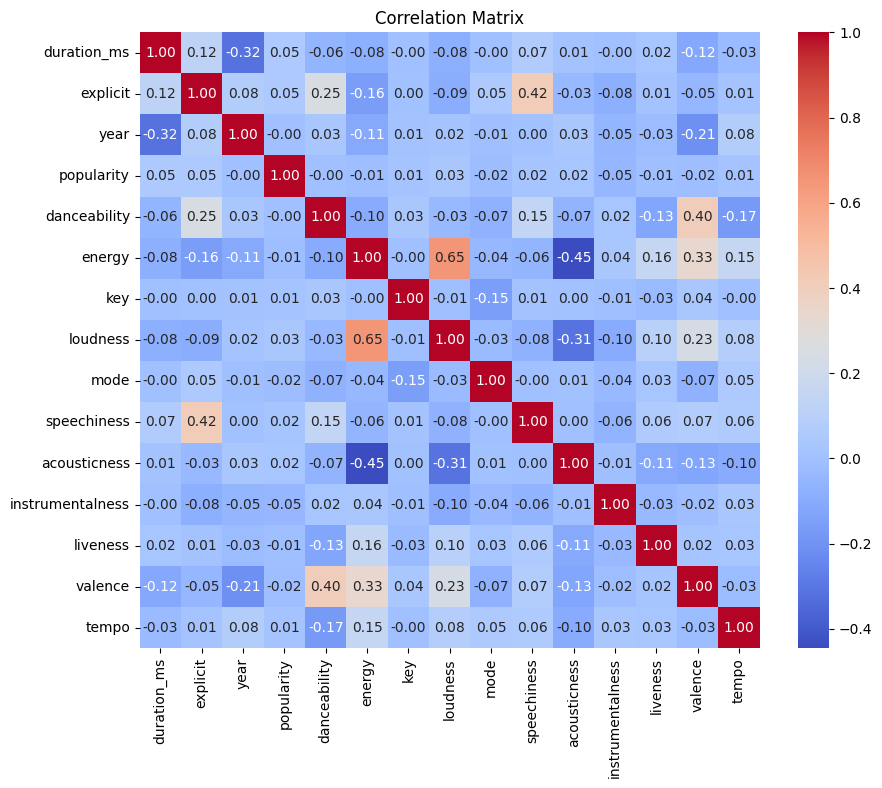

In [178]:
import seaborn as sns

numeric_data = music_data.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# visualizing trend in music against the years for independent features

In [179]:
from sklearn.preprocessing import StandardScaler
import plotly.express as px

  0%|          | 0/13 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:04<00:00,  2.91it/s]


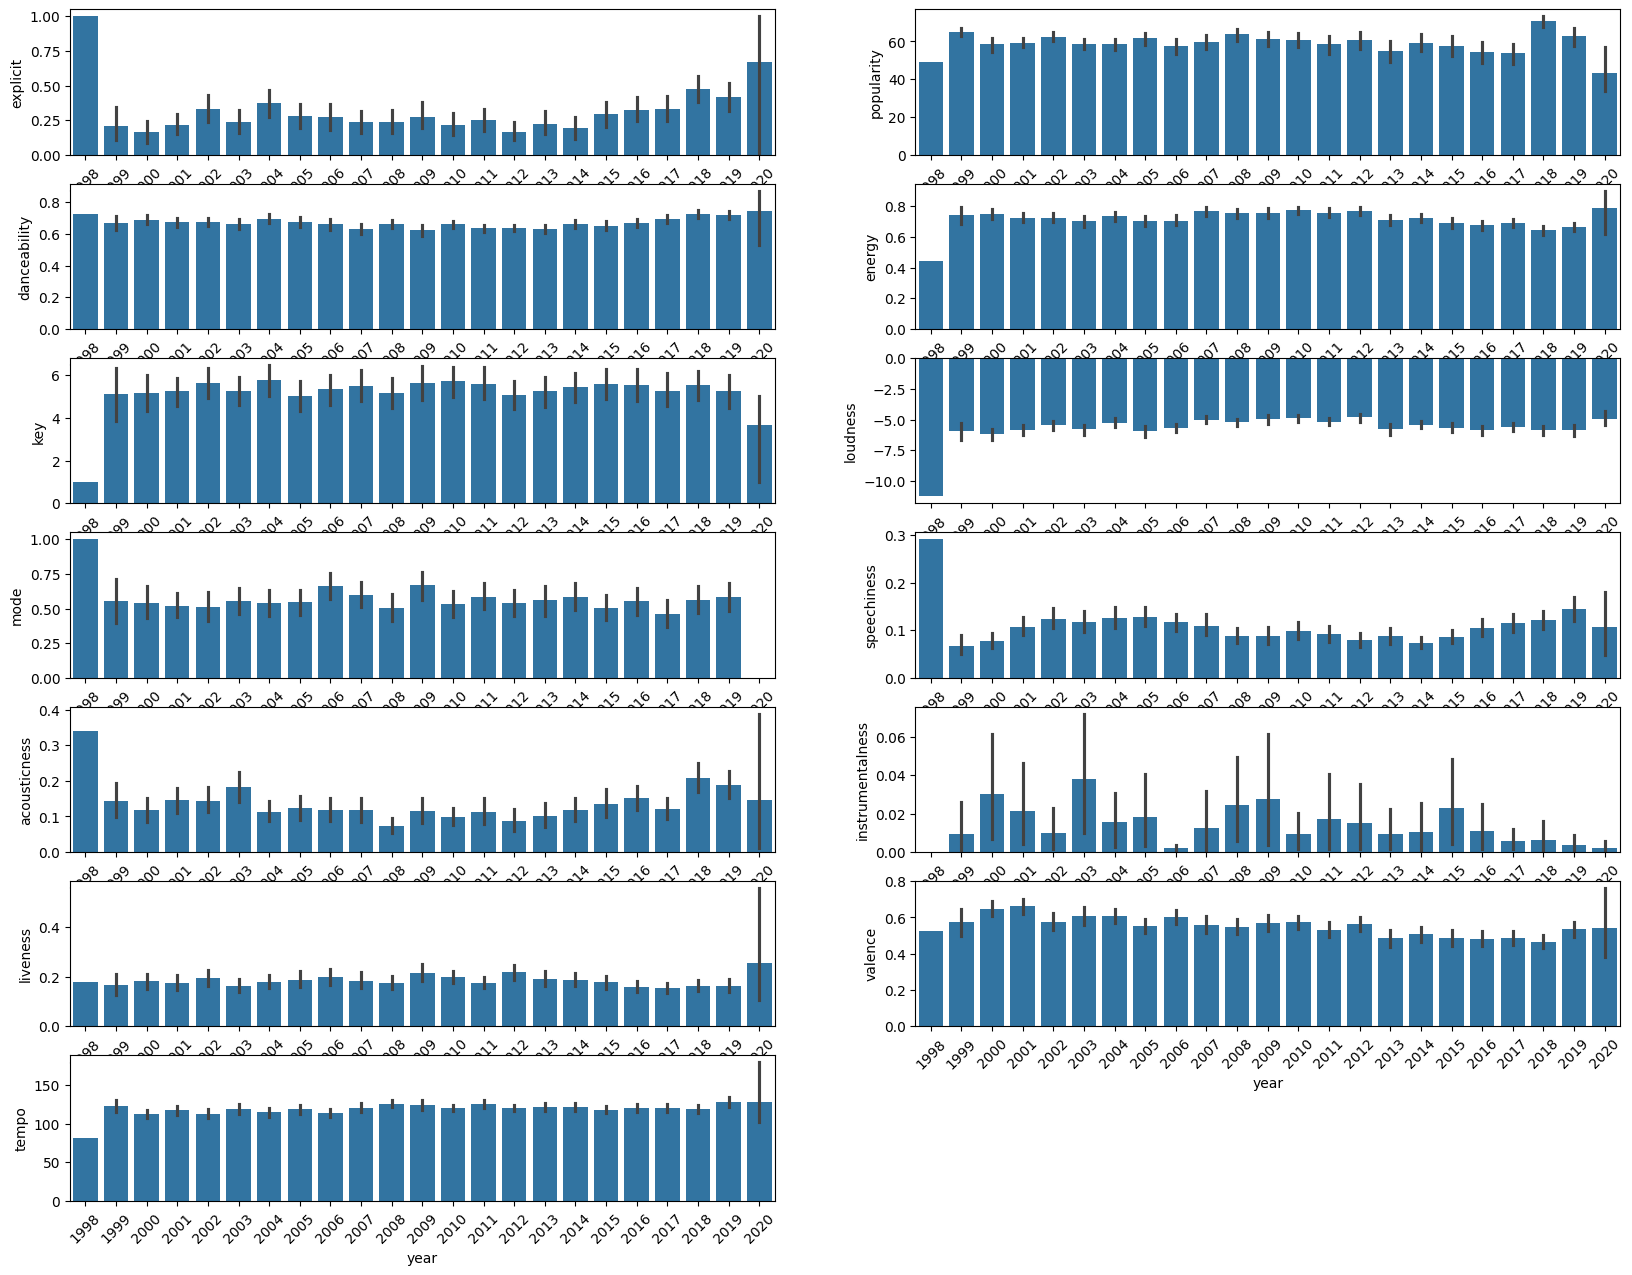

In [180]:
visual_data = music_data.drop(columns=['song', 'artist', 'year', 'genre'])

plt.figure(figsize=(20, 20))
for i in tqdm(np.arange(1, len(visual_data.columns))):
    plt.subplot(9, 2, i)
    sb.barplot(x=music_data.year,y=visual_data[visual_data.columns[i]])
    plt.xticks(rotation=45);
plt.show()

# Heat map

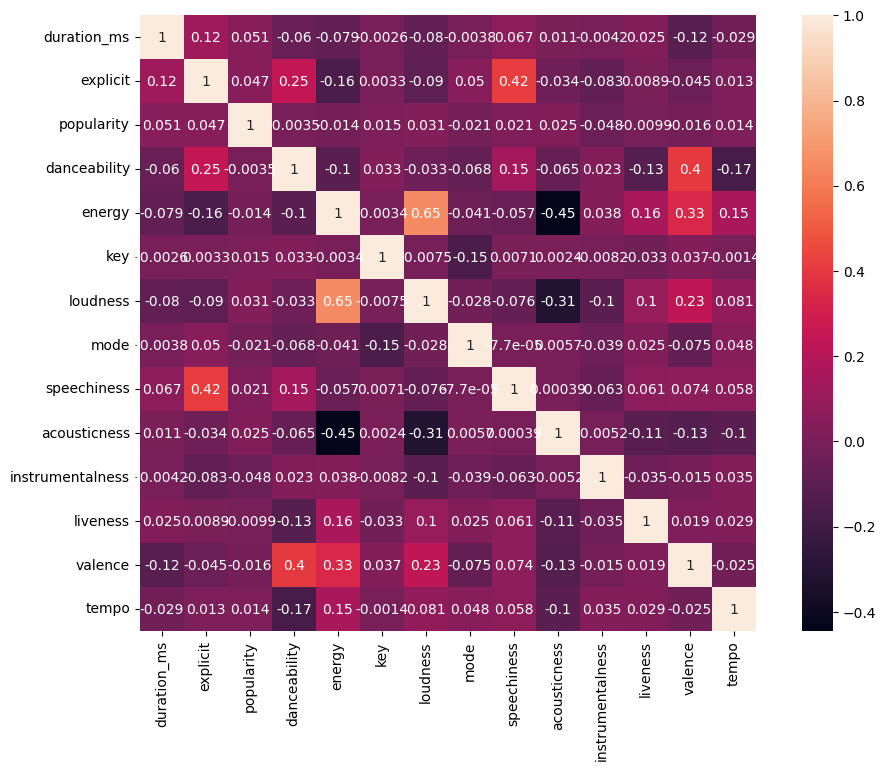

In [181]:
plt.subplots(figsize=(12, 8))
sb.heatmap(visual_data.corr(), annot=True, square=True)
plt.show()

# ENCODING THE MUSIC GENRE COLUMN

In [182]:
from sklearn.preprocessing import OneHotEncoder
unique_genres = set()
for genre_list in music_data["genre"]:
    genres = genre_list.split(",")
    for genre in genres:
        unique_genres.add(genre)

# Create a one-hot encoding for the genre column
encoder = OneHotEncoder()
encoder.fit([[genre] for genre in unique_genres])

# Encode the genre data
encoded_genres = []
for genres in music_data["genre"]:
    genres = genres.split(",")
    one_hot = [0 if genre not in genres else 1 for genre in unique_genres]
    encoded_genres.append(one_hot)

# Normalizing the columns

In [183]:
import os
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings("ignore")

In [184]:
def normalize_column(col):
    max_d = music_data[col].max()
    min_d = music_data[col].min()
    music_data[col] = (music_data[col] - min_d)/(max_d - min_d)

In [185]:
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = music_data.select_dtypes(include=num_types)

for col in num.columns:
    if col != 'year':
        normalize_column(col)

# Boxplot visualization to identify outliers

<Axes: >

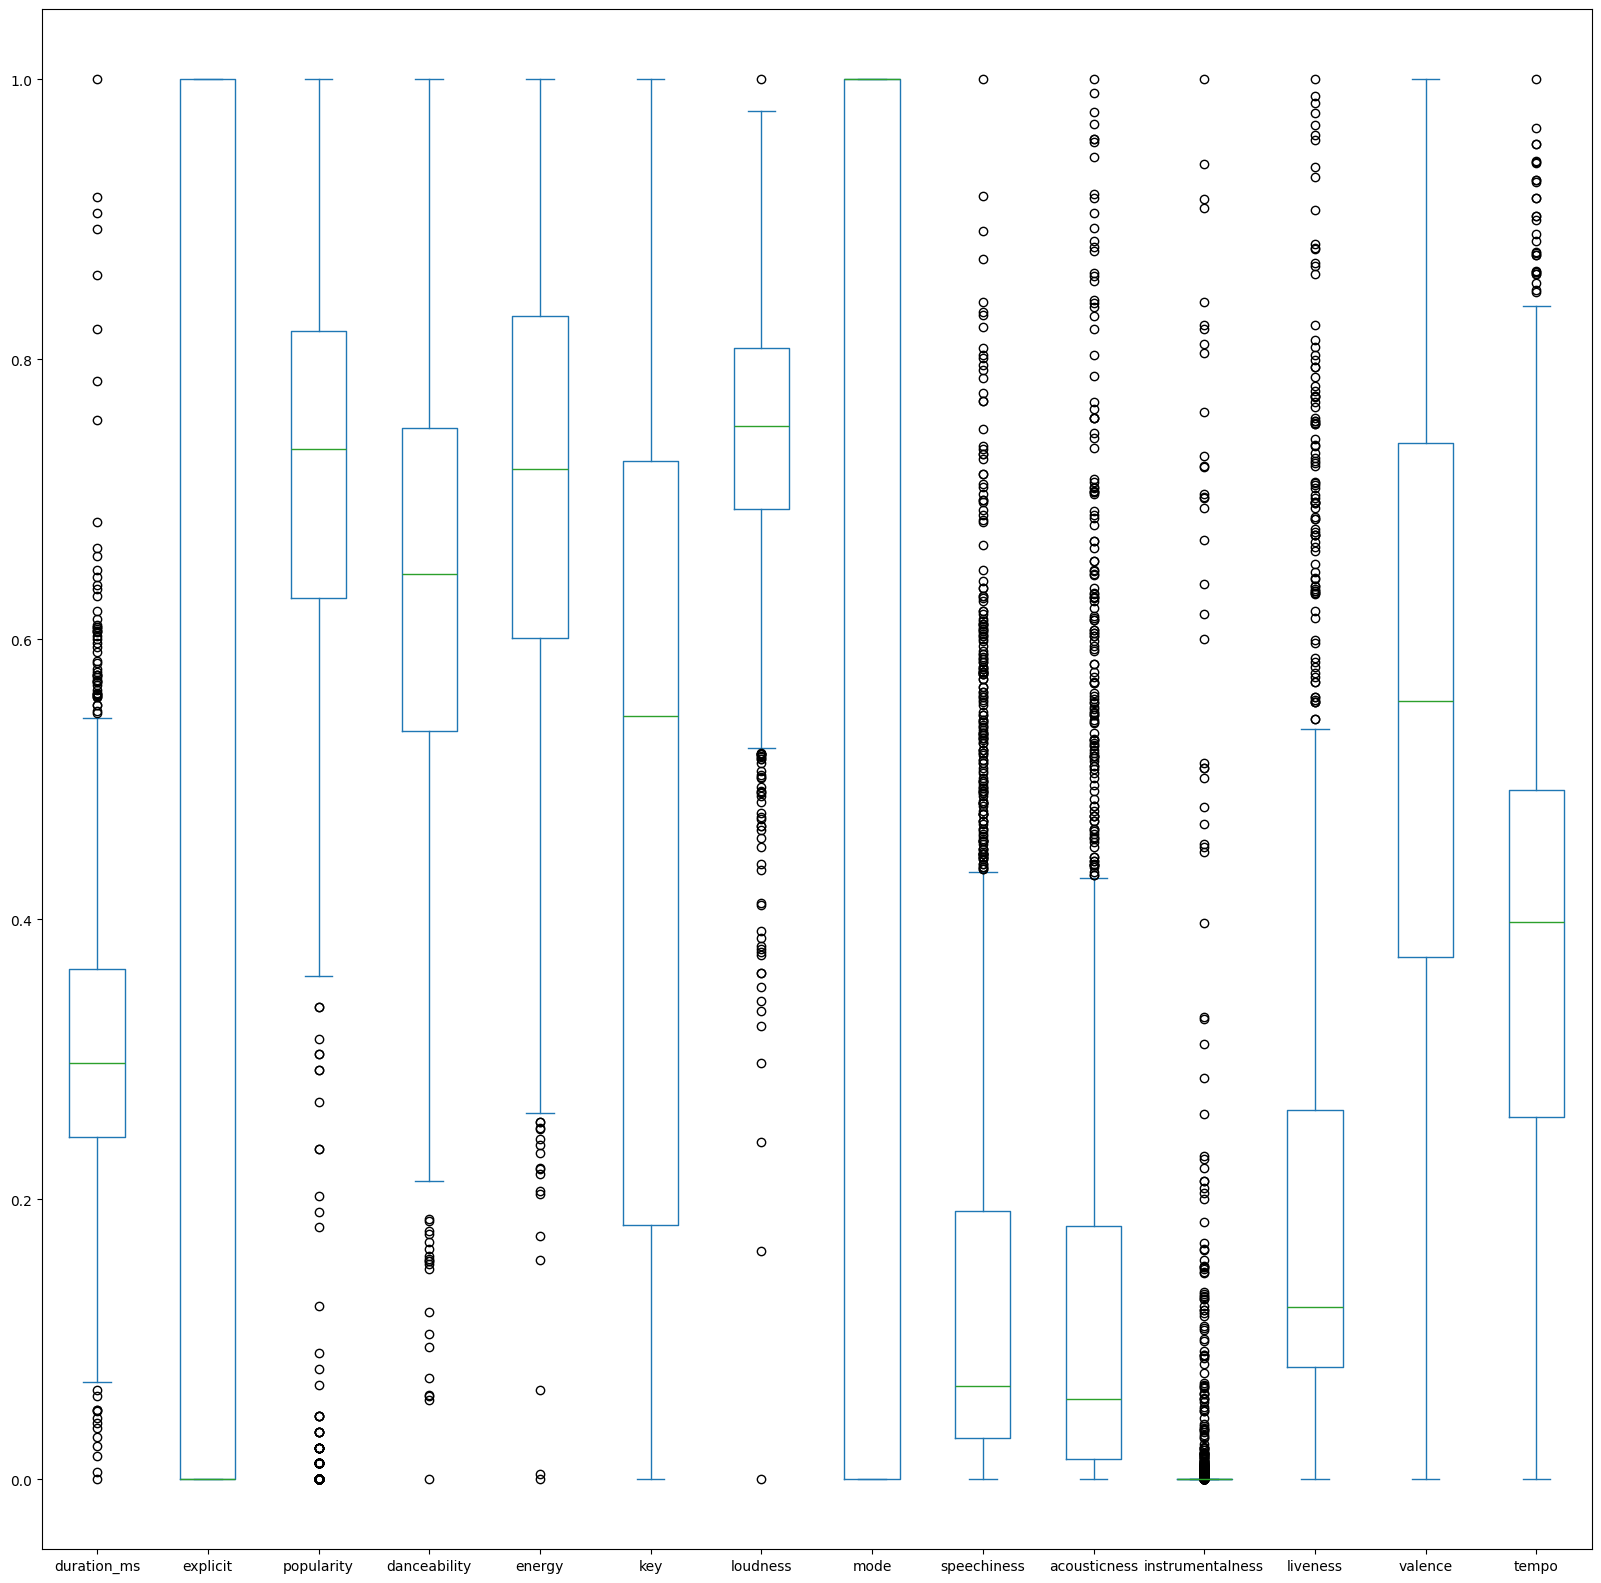

In [186]:
music_data.select_dtypes(np.number).drop(columns = ['year']).plot(kind='box' ,figsize=(20, 20) ,fontsize=10)

# Scatterplot visualization to see patterns of interest

# JOINING THE ENCODED GENRE COLUMNS WITH THE ORIGINAL DATASET

In [187]:
encoded_genres_df = pd.DataFrame(encoded_genres)

encoded_genres_df.columns = unique_genres
encoded_genres_df

,World/Traditional,blues,classical,R&B,metal,hip hop,latin,hip hop,country,jazz,...,Dance/Electronic,Folk/Acoustic,Dance/Electronic,easy listening,set(),country,easy listening,metal,Folk/Acoustic,rock
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:


# Concatenate the encoded genres DataFrame with the original dataset
music_data = pd.concat([music_data, encoded_genres_df], axis=1)

# View the dataset with the encoded genres
music_data.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,Dance/Electronic,Folk/Acoustic,Dance/Electronic,easy listening,set(),country,easy listening,metal,Folk/Acoustic,rock
0,Britney Spears,Oops!...I Did It Again,0.264478,0.0,2000,0.865169,0.735225,0.825230,0.090909,0.744639,...,0,0,0,0,0,0,0,0,0,0
1,blink-182,All The Small Things,0.145673,0.0,1999,0.887640,0.360520,0.891961,0.000000,0.770630,...,0,0,0,0,0,0,0,0,0,0
2,Faith Hill,Breathe,0.370598,0.0,1999,0.741573,0.472813,0.467217,0.636364,0.568584,...,0,0,0,0,0,1,0,0,0,0
3,Bon Jovi,It's My Life,0.300402,0.0,2000,0.876404,0.498818,0.908908,0.000000,0.812877,...,0,0,0,0,0,0,0,1,0,0
4,*NSYNC,Bye Bye Bye,0.235918,0.0,2000,0.730337,0.573286,0.924796,0.727273,0.776164,...,0,0,0,0,0,0,0,0,0,0


# importing the KMeans clustering algorithm that is used to generate categories from music relations

In [189]:
import pickle

In [190]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=10)
cat = km.fit_predict(num)
pickle.dump(km , open('knn_model.pk1' , 'wb'))
music_data['cat'] = cat
normalize_column('cat')

In [191]:
music_data.cat[:10]

0    0.000000
1    0.666667
2    0.333333
3    0.888889
4    0.777778
5    0.333333
6    0.111111
7    1.000000
8    1.000000
9    0.111111
Name: cat, dtype: float64

In [192]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=10))])
X = music_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
pickle.dump(km , open('cluster_model.pk1' , 'wb'))
music_data['cluster'] = cluster_pipeline.predict(X)

# Visualizing the Clusters with t-SNE

In [193]:
tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne', TSNE(n_components=2, verbose=1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = music_data['genre']
projection['cluster'] = music_data['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'])
fig.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.035s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 1.709135
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.129929
[t-SNE] KL divergence after 1000 iterations: 1.124630


# Splitting the data into train, test and validation sets

In [194]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = music_data.select_dtypes(np.number).drop(columns = ['cat','cluster','year']).copy()
y = music_data['cluster']

In [195]:
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state=0)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print('X_train= ',X_train.shape), print('y_train= ', y_train.shape)
print('x_train= ',X_valid.shape), print('y_valid= ',y_valid.shape)
print('x_test=  ',X_test.shape), print('y_test=  ',y_test.shape)

X_train=  (1600, 39)
y_train=  (1600,)
x_train=  (200, 39)
y_valid=  (200,)
x_test=   (200, 39)
y_test=   (200,)


(None, None)

# using various values of K we shall train our model

In [196]:
knn1= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=1)
knn5= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=5)
knn10= KNeighborsClassifier(metric='cosine', algorithm='brute', n_neighbors=10)

# fitted with both the training and validation data then training data again to learn different patterns and prevent bias

In [197]:
model_knn5 = knn5.fit(X_train, y_train)
pickle.dump(model_knn5 , open('knn5Model.pk1' , 'wb'))
knn1.fit(X_train, y_train)
knn10.fit(X_train, y_train)

knn5.fit(X_valid, y_valid)
knn1.fit(X_valid, y_valid)
knn10.fit(X_valid, y_valid)

knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)
knn10.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_valid)
y_pred_1 = knn1.predict(X_valid)
y_pred_10 = knn1.predict(X_valid)

In [198]:
X_valid

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,Dance/Electronic,Folk/Acoustic,Dance/Electronic,easy listening,set(),country,easy listening,metal,Folk/Acoustic,rock
563,0.352923,0.0,0.629213,0.599291,0.532888,0.636364,0.663998,1.0,0.002352,0.473350,...,0,0,0,0,0,0,0,0,0,0
1544,0.249888,1.0,0.719101,0.549645,0.735198,0.272727,0.704763,1.0,0.080499,0.001907,...,0,0,0,0,0,0,0,0,0,0
1610,0.391399,0.0,0.921348,0.427896,0.675882,0.000000,0.693102,0.0,0.026230,0.216173,...,0,0,0,0,0,0,0,0,0,0
1901,0.218477,0.0,0.932584,0.676123,0.392014,0.636364,0.471835,1.0,0.636397,0.336053,...,1,0,0,0,0,0,0,0,0,0
999,0.347176,0.0,0.820225,0.247045,0.792395,0.727273,0.746220,0.0,0.032742,0.019141,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1051,0.267027,0.0,0.033708,0.624113,0.678000,0.181818,0.791630,1.0,0.016100,0.011046,...,0,0,0,0,0,0,0,0,0,0
452,0.213140,0.0,0.752809,0.647754,0.664230,0.818182,0.673733,1.0,0.023336,0.041477,...,0,0,0,0,0,0,0,0,0,0
61,0.501043,0.0,0.584270,0.724586,0.717191,0.181818,0.714893,0.0,0.014291,0.043424,...,0,0,0,0,0,0,0,0,0,0
1790,0.165972,0.0,0.685393,0.542553,0.735198,1.000000,0.800030,0.0,0.062952,0.003771,...,0,0,0,0,0,0,0,0,0,0


In [199]:
y_pred_5

array([4, 1, 7, 9, 1, 1, 4, 1, 1, 1, 7, 4, 7, 4, 1, 4, 4, 9, 4, 1, 4, 4,
       4, 2, 1, 4, 7, 1, 4, 4, 4, 4, 7, 9, 7, 4, 4, 1, 4, 2, 7, 4, 1, 4,
       1, 4, 1, 4, 4, 1, 9, 1, 7, 4, 9, 9, 9, 4, 4, 4, 9, 4, 1, 1, 1, 1,
       1, 7, 1, 0, 1, 1, 1, 1, 7, 1, 7, 9, 1, 4, 4, 1, 4, 4, 9, 1, 0, 1,
       4, 1, 1, 1, 4, 9, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4, 4, 9, 1, 4, 7, 4,
       1, 1, 1, 1, 4, 1, 4, 1, 2, 4, 1, 1, 4, 1, 4, 9, 4, 1, 9, 1, 7, 1,
       4, 1, 4, 1, 4, 9, 4, 4, 1, 1, 4, 4, 4, 1, 4, 4, 4, 4, 7, 1, 4, 1,
       9, 4, 4, 1, 1, 4, 4, 7, 1, 1, 4, 9, 4, 7, 9, 1, 1, 1, 1, 9, 4, 2,
       4, 4, 4, 1, 1, 7, 4, 4, 1, 4, 9, 1, 7, 1, 4, 1, 1, 1, 8, 4, 4, 1,
       1, 1], dtype=int32)

# accuracy score

In [200]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_valid, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_valid, y_pred_1)*100)
print("Accuracy with k=10", accuracy_score(y_valid, y_pred_10)*100)

Accuracy with k=5 94.0
Accuracy with k=1 95.5
Accuracy with k=10 95.5


# confusion matrix

In [201]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_valid, y_pred_1))
print(confusion_matrix(y_valid, y_pred_5))
print(confusion_matrix(y_valid, y_pred_10))

[[ 2  0  0  0  0  0  0  0]
 [ 0 69  0  0  0  0  0  1]
 [ 0  0  4  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  0 75  0  0  1]
 [ 0  0  0  0  0 18  0  0]
 [ 0  0  0  0  0  0  1  0]
 [ 0  6  0  0  1  0  0 21]]
[[ 2  0  0  0  0  0  0  0]
 [ 0 69  0  0  0  0  0  1]
 [ 0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1]
 [ 0  0  0  0 76  0  0  0]
 [ 0  0  0  0  0 18  0  0]
 [ 0  0  0  0  0  0  1  0]
 [ 0 10  0  0  0  0  0 18]]
[[ 2  0  0  0  0  0  0  0]
 [ 0 69  0  0  0  0  0  1]
 [ 0  0  4  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0]
 [ 0  0  0  0 75  0  0  1]
 [ 0  0  0  0  0 18  0  0]
 [ 0  0  0  0  0  0  1  0]
 [ 0  6  0  0  1  0  0 21]]


# Classification report

In [202]:
print(classification_report(y_valid, y_pred_1))
print(classification_report(y_valid, y_pred_5))
print(classification_report(y_valid, y_pred_10))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.92      0.99      0.95        70
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       0.99      0.99      0.99        76
           7       1.00      1.00      1.00        18
           8       1.00      1.00      1.00         1
           9       0.91      0.75      0.82        28

    accuracy                           0.95       200
   macro avg       0.98      0.97      0.97       200
weighted avg       0.95      0.95      0.95       200

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.87      0.99      0.93        70
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00        76
           7       1.00 

# Visualizing the prediction

In [203]:
tsne_model = TSNE(n_components = 2, random_state = 0)
tsne_data_X_valid = tsne_model.fit_transform(X_test)

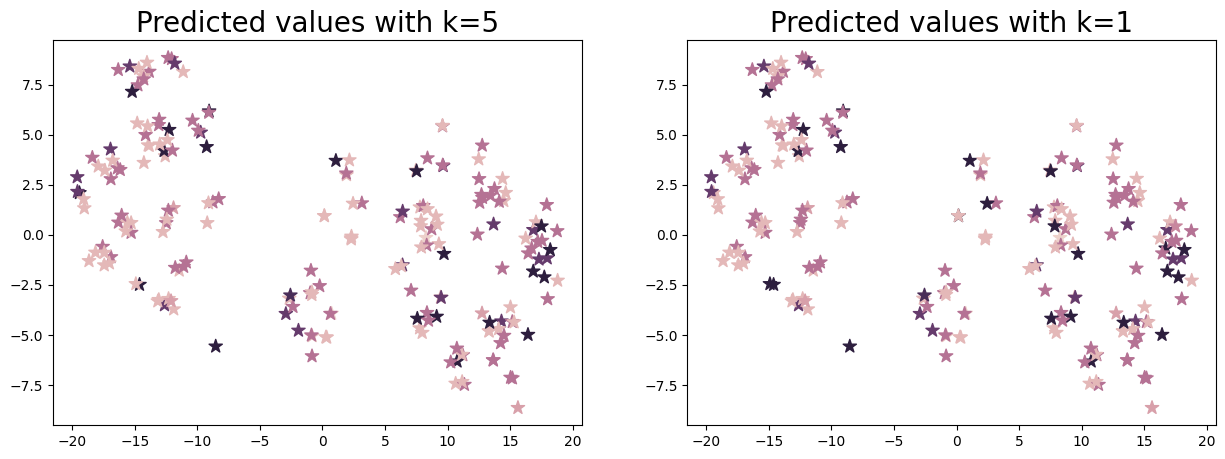

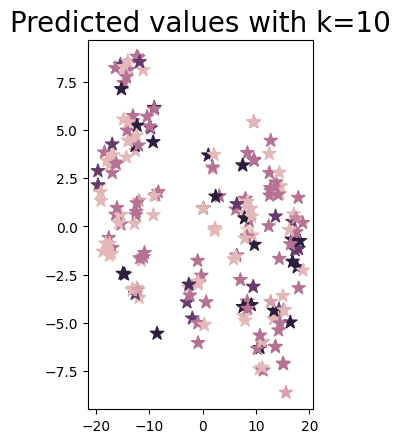

In [204]:
cmap = sb.cubehelix_palette(as_cmap=True)
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_5, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=5", fontsize=20)
plt.subplot(1,2,2)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_1, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=1", fontsize=20)
plt.show()
plt.subplot(1,2,2)
plt.scatter(tsne_data_X_valid[:,0], tsne_data_X_valid[:,1], c=y_pred_10, marker= '*', s=100, cmap=cmap)
plt.title("Predicted values with k=10", fontsize=20)
plt.show()

# Creating a recommendation machine

In [205]:
!python -m pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org fuzzywuzzy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [206]:
from fuzzywuzzy import process
X_test

,duration_ms,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,...,Dance/Electronic,Folk/Acoustic,Dance/Electronic,easy listening,set(),country,easy listening,metal,Folk/Acoustic,rock
47,0.333847,0.0,0.662921,0.760047,0.670586,0.090909,0.780660,0.0,0.031295,0.056129,...,0,0,0,0,0,0,0,0,0,0
648,0.307084,0.0,0.786517,0.542553,0.356000,0.000000,0.588349,0.0,0.018452,0.859628,...,0,0,0,0,0,0,0,0,0,0
1677,0.311575,1.0,0.000000,0.660757,0.514882,1.000000,0.612017,0.0,0.164255,0.012071,...,0,0,0,0,0,0,0,0,0,0
1426,0.205846,0.0,0.741573,0.745863,0.880309,0.818182,0.748987,0.0,0.004703,0.022419,...,0,0,0,0,0,0,0,0,0,1
1,0.145673,0.0,0.887640,0.360520,0.891961,0.000000,0.770630,1.0,0.046310,0.010534,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,0.173948,0.0,0.730337,0.620567,0.823112,0.636364,0.807886,0.0,0.011035,0.012890,...,1,0,0,0,0,0,0,0,0,0
1212,0.231176,0.0,0.775281,0.600473,0.717191,0.636364,0.706839,0.0,0.132598,0.249985,...,1,0,0,0,0,0,0,0,0,0
1704,0.372058,0.0,0.842697,0.698582,0.750026,0.818182,0.812630,0.0,0.052641,0.415972,...,1,0,0,0,0,0,0,0,0,0
658,0.354612,0.0,0.415730,0.343972,0.727783,0.636364,0.733719,1.0,0.025868,0.145475,...,0,0,0,0,0,0,0,0,0,0


In [207]:
X_test.shape

(200, 39)

In [211]:
recommendation_set = music_data.merge(X_test, how = 'inner' ,indicator=False)
recommendation_set
recommendation_set.to_csv('F:/Jupyter/Music-Recommendation-using-Kmeans-KNN/recommendation_set.csv', index=False)
recommendation_set.head(10)


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,Dance/Electronic,easy listening,set(),country,easy listening,metal,Folk/Acoustic,rock,cat,cluster
0,blink-182,All The Small Things,0.145673,0.0,1999,0.887640,0.360520,0.891961,0.000000,0.770630,...,0,0,0,0,0,0,0,0,0.666667,7
1,Eminem,The Real Slim Shady,0.461274,1.0,2000,0.966292,0.969267,0.641987,0.454545,0.803933,...,0,0,0,0,0,0,0,0,0.111111,4
2,Modjo,Lady - Hear Me Tonight,0.523118,0.0,2001,0.865169,0.698582,0.797691,0.545455,0.735596,...,1,0,0,0,0,0,0,0,0.111111,2
3,Linkin Park,In the End,0.279890,0.0,2000,0.932584,0.504728,0.857007,0.272727,0.723589,...,0,0,0,0,0,1,0,0,0.000000,7
4,DMX,Party Up,0.419959,1.0,1999,0.797753,0.450355,0.927974,1.000000,0.850479,...,0,0,0,0,0,0,0,0,1.000000,4
5,Mýa,Case Of The Ex (Whatcha Gonna Do),0.333847,0.0,2000,0.662921,0.760047,0.670586,0.090909,0.780660,...,0,0,0,0,0,0,0,0,0.333333,1
6,Mary Mary,Shackles (Praise You),0.229953,0.0,2000,0.719101,0.768322,0.825230,0.636364,0.876618,...,0,0,0,0,0,0,0,0,0.777778,1
7,Jagged Edge,He Can't Love U,0.353104,0.0,2000,0.617978,0.699764,0.827349,0.727273,0.817373,...,0,0,0,0,0,0,0,0,0.333333,4
8,Craig David,Fill Me In,0.388526,0.0,2000,0.674157,0.653664,0.729901,0.727273,0.668693,...,0,0,0,0,0,0,0,0,1.000000,4
9,Red Hot Chili Peppers,Otherside,0.383604,0.0,1999,0.876404,0.388889,0.783921,0.000000,0.852308,...,0,0,0,0,0,0,0,0,1.000000,7


In [212]:
#####


# Fetch song info (row index 1 as example)
song_info = recommendation_set.loc[5, ['song', 'artist']]  # Adjust index as needed
song_name = song_info['song']  # Use the 'song' column value


def recommender(song_name, data, model):
    match = process.extractOne(song_name, recommendation_set['song'])
    if match:
        idx = match[2]  # Match index from fuzzy matching
        requiredSongs = recommendation_set.select_dtypes(np.number).drop(columns=['cat', 'cluster', 'year']).copy()
        distances, indices = model.kneighbors(requiredSongs.iloc[idx].values.reshape(1, -1))
        rec = []
        for i in indices[0][:5]:  # Get top 5 recommendations
            rec.append(f"{music_data['song'][i]} by {music_data['artist'][i]}")
        return rec
    else:
        return ["Song not found in dataset"]


# Get recommendations using the defined song_name
recommendations = recommender(song_name, X_test, knn5Model)

# Display results
print(f"Recommendations for '{song_name}':")
for idx, rec in enumerate(recommendations, 1):
    print(f"{idx}. {rec}")



Recommendations for 'Case Of The Ex (Whatcha Gonna Do)':
1. Better Than Me by Hinder
2. Somebody That I Used To Know by Gotye
3. Rude Boy by Rihanna
4. In The Dark by DEV
5. Big Pimpin' by JAY-Z


# Using lime to visualize predictions

<Figure size 1200x800 with 0 Axes>

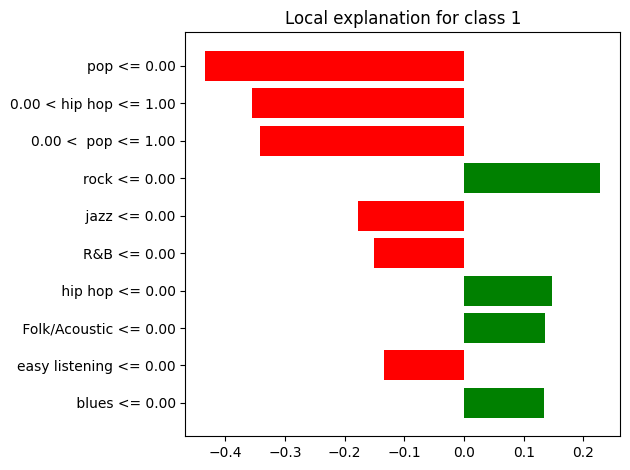

In [210]:
import lime
import lime.lime_tabular

# Create an instance of the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=knn5.classes_, discretize_continuous=True)

# Calculate the LIME explanation for a sample from the test data
exp = explainer.explain_instance(X_valid.iloc[0,:].values, knn5.predict_proba, num_features=10)

# Access the LIME explanation values
lime_values = exp.local_exp[1]

fig = plt.figure(figsize=(12, 8))
exp.as_pyplot_figure()
plt.tight_layout()